# Explore here

In [1]:
# Your code here
import pandas as pd
df=pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
# Verificar el tamaño del dataset (filas y columnas)
print(f"El dataset tiene {df.shape[0]} filas y {df.shape[1]} columnas.")

# Verificar los tipos de datos y valores nulos
print(df.info())

# Resumen estadístico de las columnas numéricas
print(df.describe())

# Verificar valores únicos de columnas categóricas
for col in ['sex', 'smoker', 'region']:
    print(f"\nValores únicos en {col}: {df[col].unique()}")

El dataset tiene 1338 filas y 7 columnas.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000  

In [3]:
df.to_csv('../data/raw/df_raw.csv',index=False)

/tmp/ipykernel_794/3122482652.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[columna], ax=axes[i], palette="viridis")
/tmp/ipykernel_794/3122482652.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[columna], ax=axes[i], palette="viridis")
/tmp/ipykernel_794/3122482652.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[columna], ax=axes[i], palette="viridis")


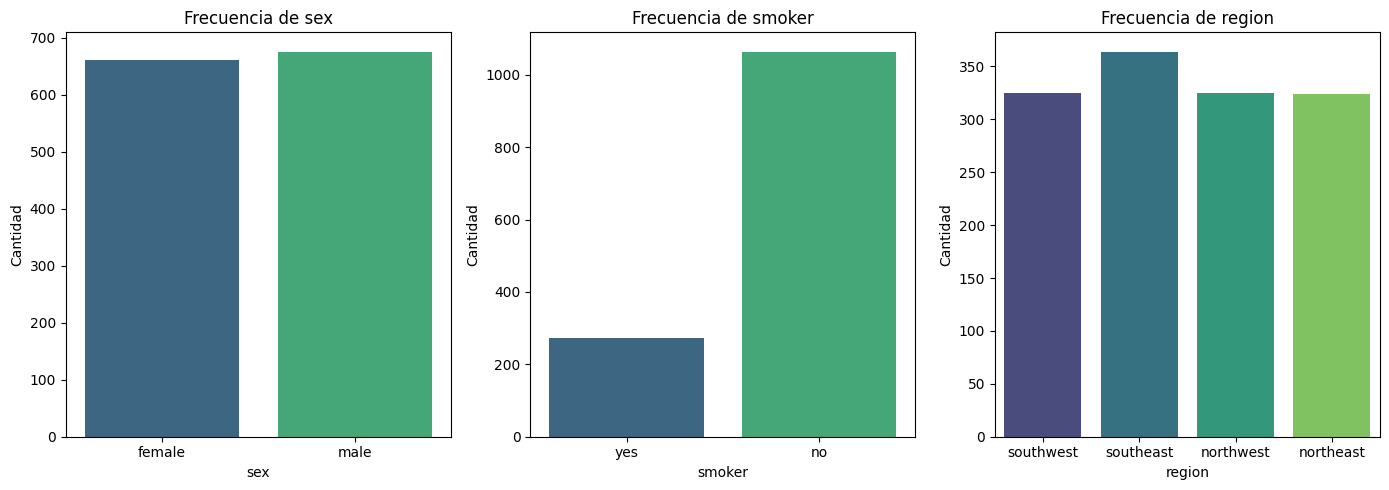

In [4]:
#ANALISIS VARIABLE UNIVARIANTE
#ANALISIS DE VARIABLES CATEGORICAS
import matplotlib.pyplot as plt
import seaborn as sns

# Variables categóricas a analizar
columnas_categoricas = ['sex', 'smoker', 'region']

# Crear subplots para gráficos de barras
fig, axes = plt.subplots(1, len(columnas_categoricas), figsize=(14, 5))

for i, columna in enumerate(columnas_categoricas):
    sns.countplot(x=df[columna], ax=axes[i], palette="viridis")
    axes[i].set_title(f"Frecuencia de {columna}")
    axes[i].set_xlabel(columna)
    axes[i].set_ylabel("Cantidad")

plt.tight_layout()
plt.show()


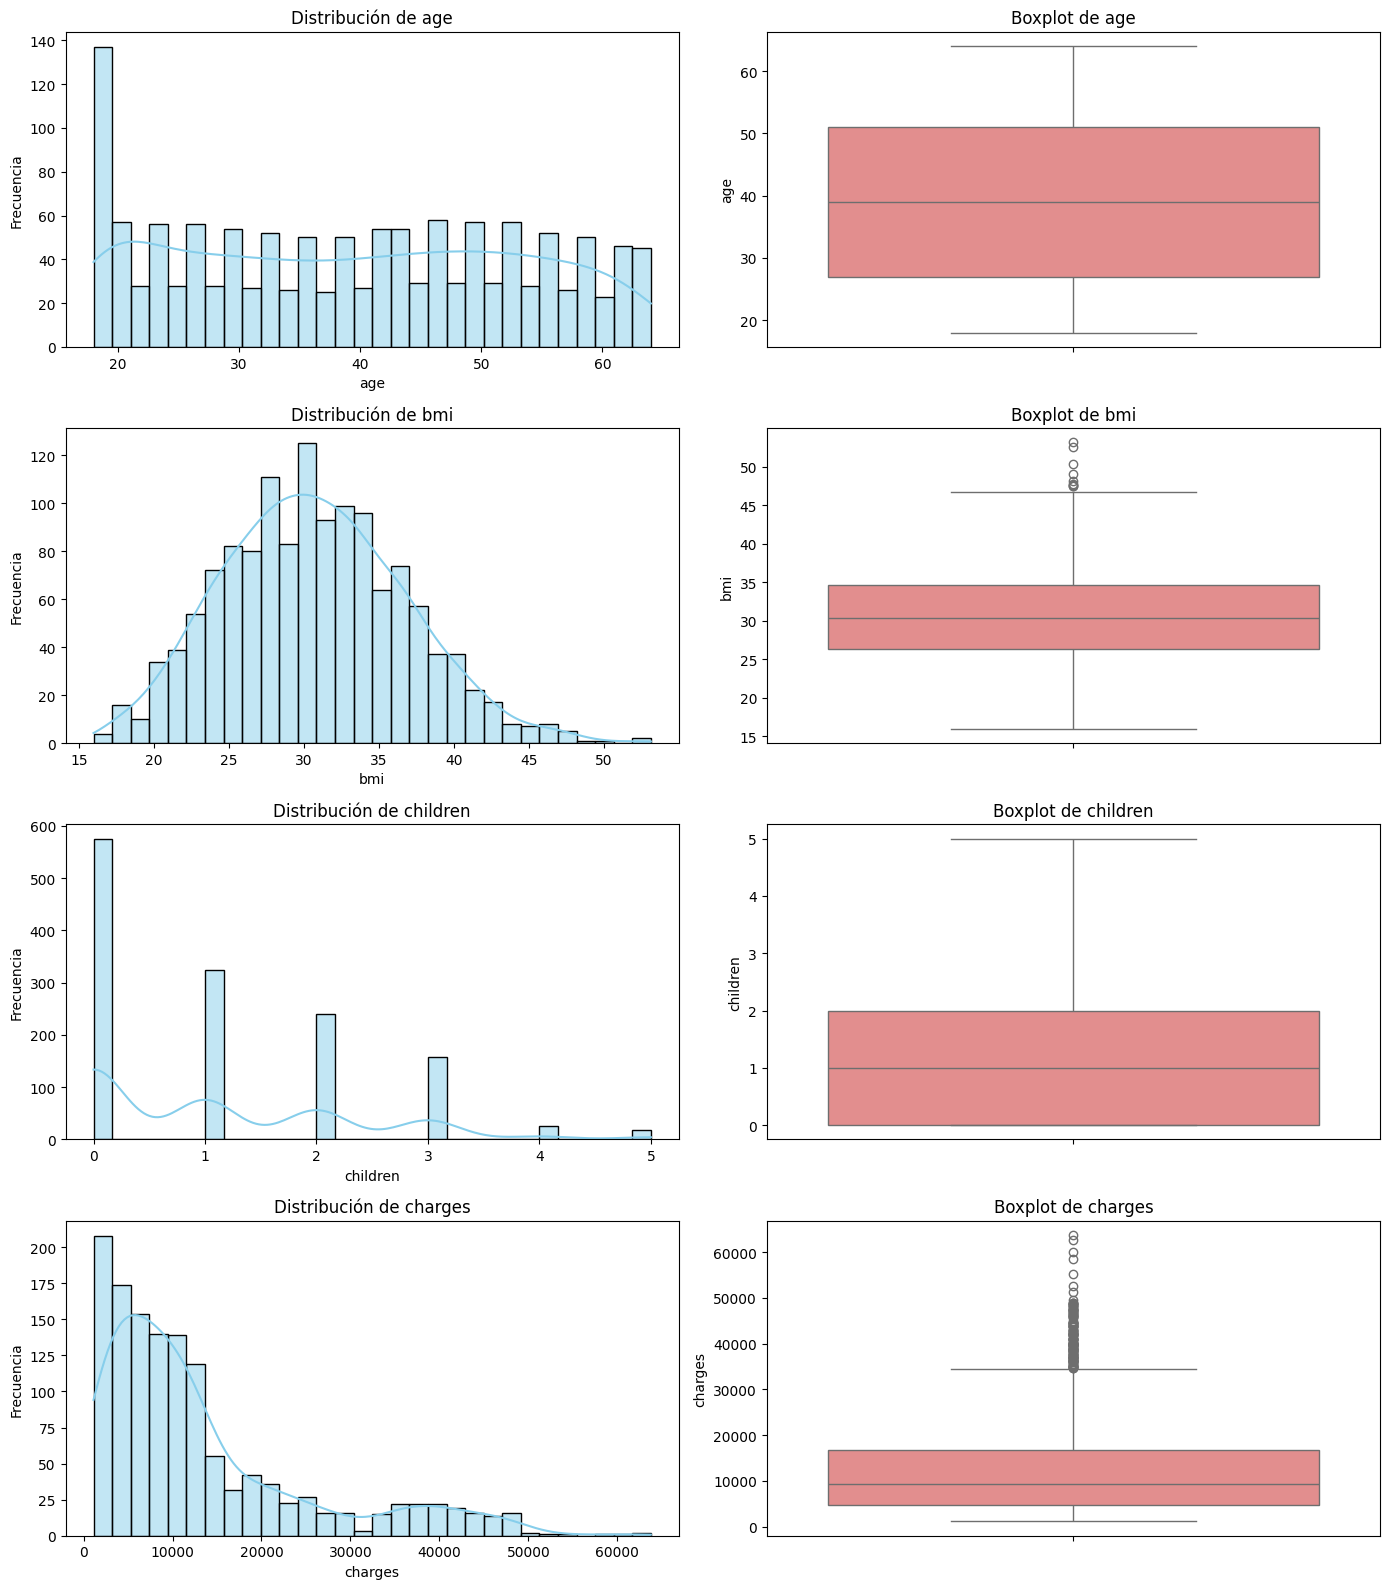

In [5]:
#ANALISIS VARIABLE UNIVARIANTE
#Variables númericas
import matplotlib.pyplot as plt
import seaborn as sns

# Lista de variables numéricas a analizar
columnas_numericas = ['age', 'bmi', 'children', 'charges']

# Crear subplots para histogramas y boxplots
fig, axes = plt.subplots(len(columnas_numericas), 2, figsize=(14, len(columnas_numericas) * 4))
fig.subplots_adjust(hspace=0.5)

for i, columna in enumerate(columnas_numericas):
    # Histograma
    sns.histplot(df[columna], bins=30, kde=True, ax=axes[i, 0], color='skyblue')
    axes[i, 0].set_title(f"Distribución de {columna}")
    axes[i, 0].set_xlabel(columna)
    axes[i, 0].set_ylabel("Frecuencia")
    
    # Boxplot
    sns.boxplot(y=df[columna], ax=axes[i, 1], color='lightcoral')
    axes[i, 1].set_title(f"Boxplot de {columna}")
    axes[i, 1].set_xlabel("")

plt.tight_layout()
plt.show()


In [6]:
for column in df.columns:
    if df[column].dtype=='object':
        df[column+'_n']=pd.factorize(df[column])[0]
df


,age,sex,bmi,children,smoker,region,charges,sex_n,smoker_n,region_n
0,19,female,27.900,0,yes,southwest,16884.92400,0,0,0
1,18,male,33.770,1,no,southeast,1725.55230,1,1,1
2,28,male,33.000,3,no,southeast,4449.46200,1,1,1
3,33,male,22.705,0,no,northwest,21984.47061,1,1,2
4,32,male,28.880,0,no,northwest,3866.85520,1,1,2
...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,1,1,2
1334,18,female,31.920,0,no,northeast,2205.98080,0,1,3
1335,18,female,36.850,0,no,southeast,1629.83350,0,1,1
1336,21,female,25.800,0,no,southwest,2007.94500,0,1,0


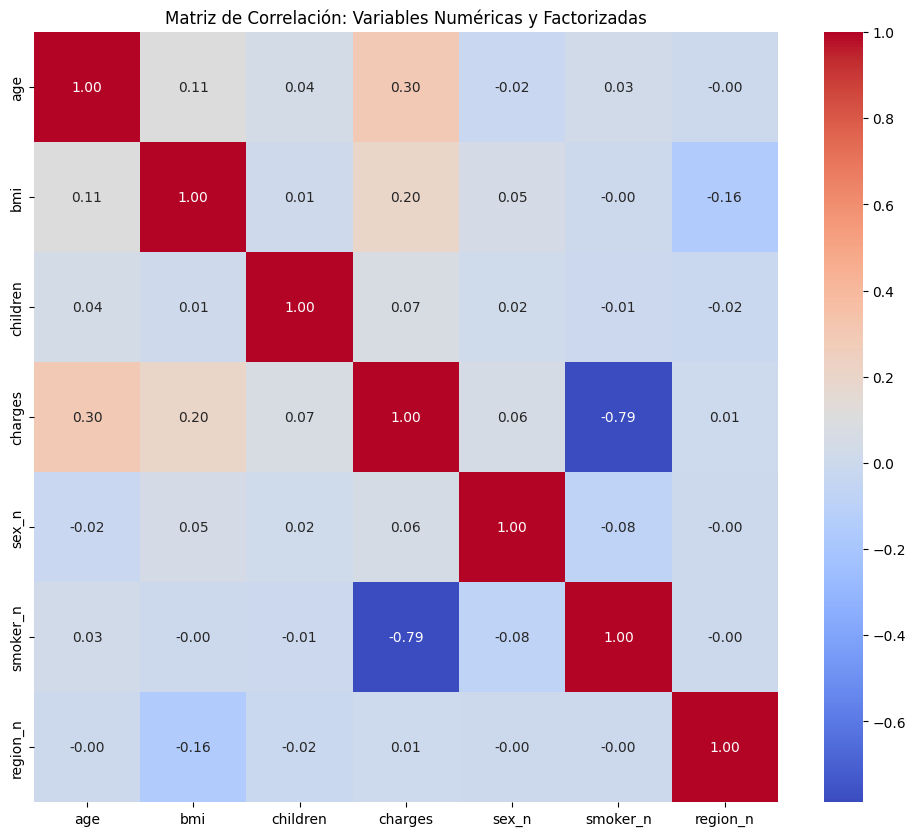

In [7]:
#ANALISIS VARIABLE MULTIVARIANTE
#NÚMERICO - NÚMERICO
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionar solo columnas numéricas
numericas = df.select_dtypes(include=['float64', 'int64'])

# Matriz de correlación con columnas numéricas y factorizadas
plt.figure(figsize=(12, 10))
sns.heatmap(numericas.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Matriz de Correlación: Variables Numéricas y Factorizadas")
plt.show()


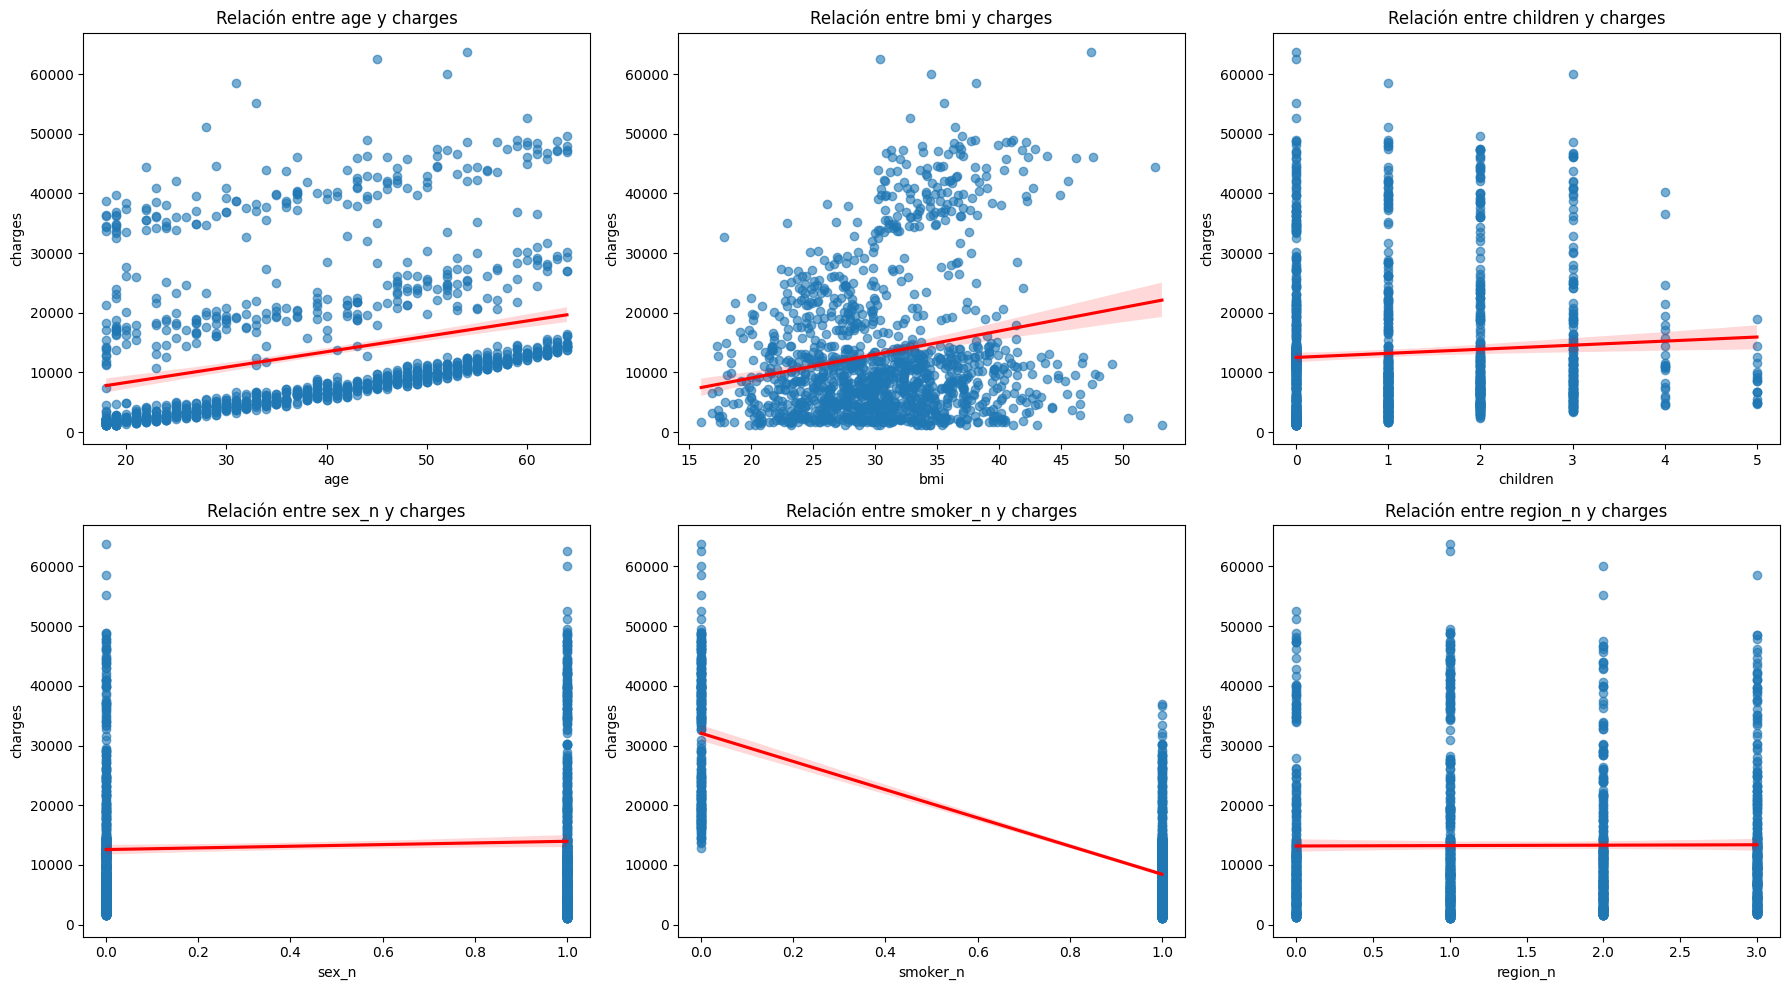

In [ ]:
variables_numericas = ['age', 'bmi', 'children', 'sex_n', 'smoker_n', 'region_n']

# Crear subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for i, columna in enumerate(variables_numericas):
    sns.regplot(x=columna, y='charges', data=df, ax=axes[i], scatter_kws={'alpha':0.6}, line_kws={"color": "red"})
    axes[i].set_title(f"Relación entre {columna} y charges")
    axes[i].set_xlabel(columna)
    axes[i].set_ylabel("charges")

plt.tight_layout()
plt.show()


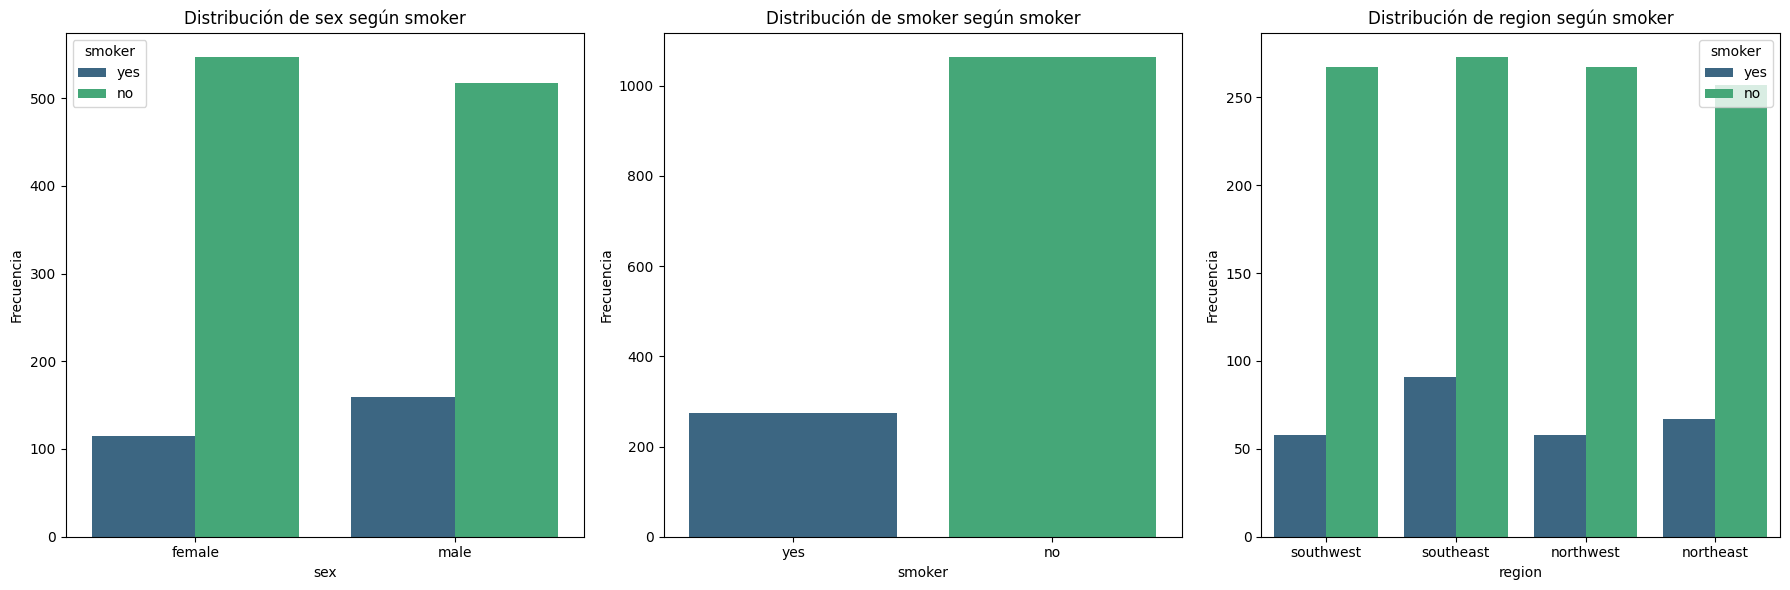

In [9]:
#ANALISIS VARIABLE MULTIVARIANTE
#Análisis categorico - categorico
import seaborn as sns
import matplotlib.pyplot as plt

variables_cat = ['sex', 'smoker', 'region']

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, var in enumerate(variables_cat):
    sns.countplot(data=df, x=var, hue='smoker', ax=axes[i], palette='viridis')
    axes[i].set_title(f"Distribución de {var} según smoker")
    axes[i].set_xlabel(var)
    axes[i].set_ylabel("Frecuencia")

plt.tight_layout()
plt.show()


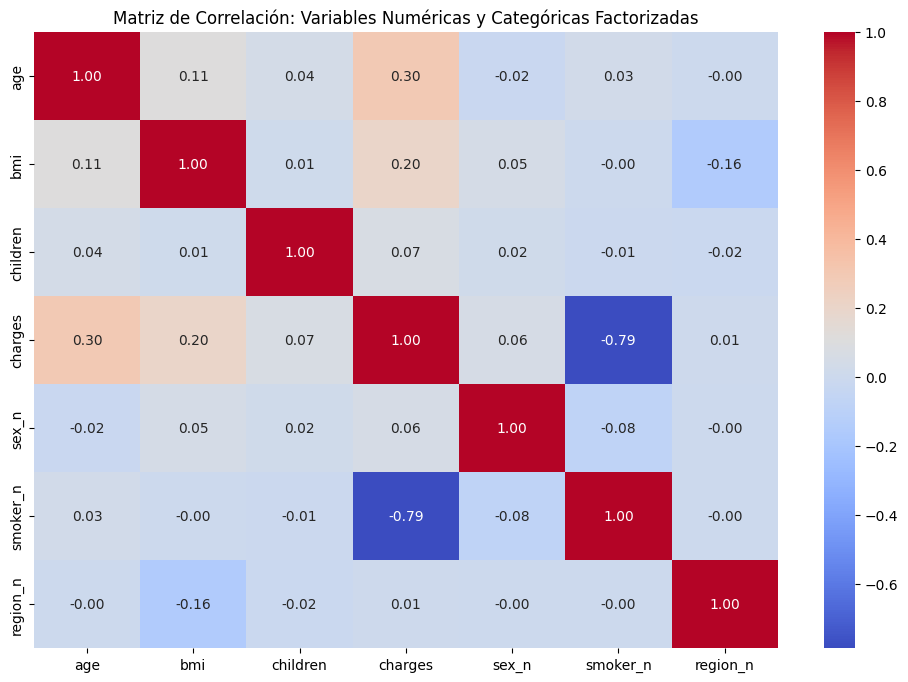

In [10]:
#ANALISIS VARIABLE MULTIVARIANTE
#Análisis númerico - categorico
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionar solo columnas numéricas y factorizadas
numericas_categoricas = ['age', 'bmi', 'children', 'charges', 'sex_n', 'smoker_n', 'region_n']

# Calcular la matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(df[numericas_categoricas].corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Matriz de Correlación: Variables Numéricas y Categóricas Factorizadas")
plt.show()


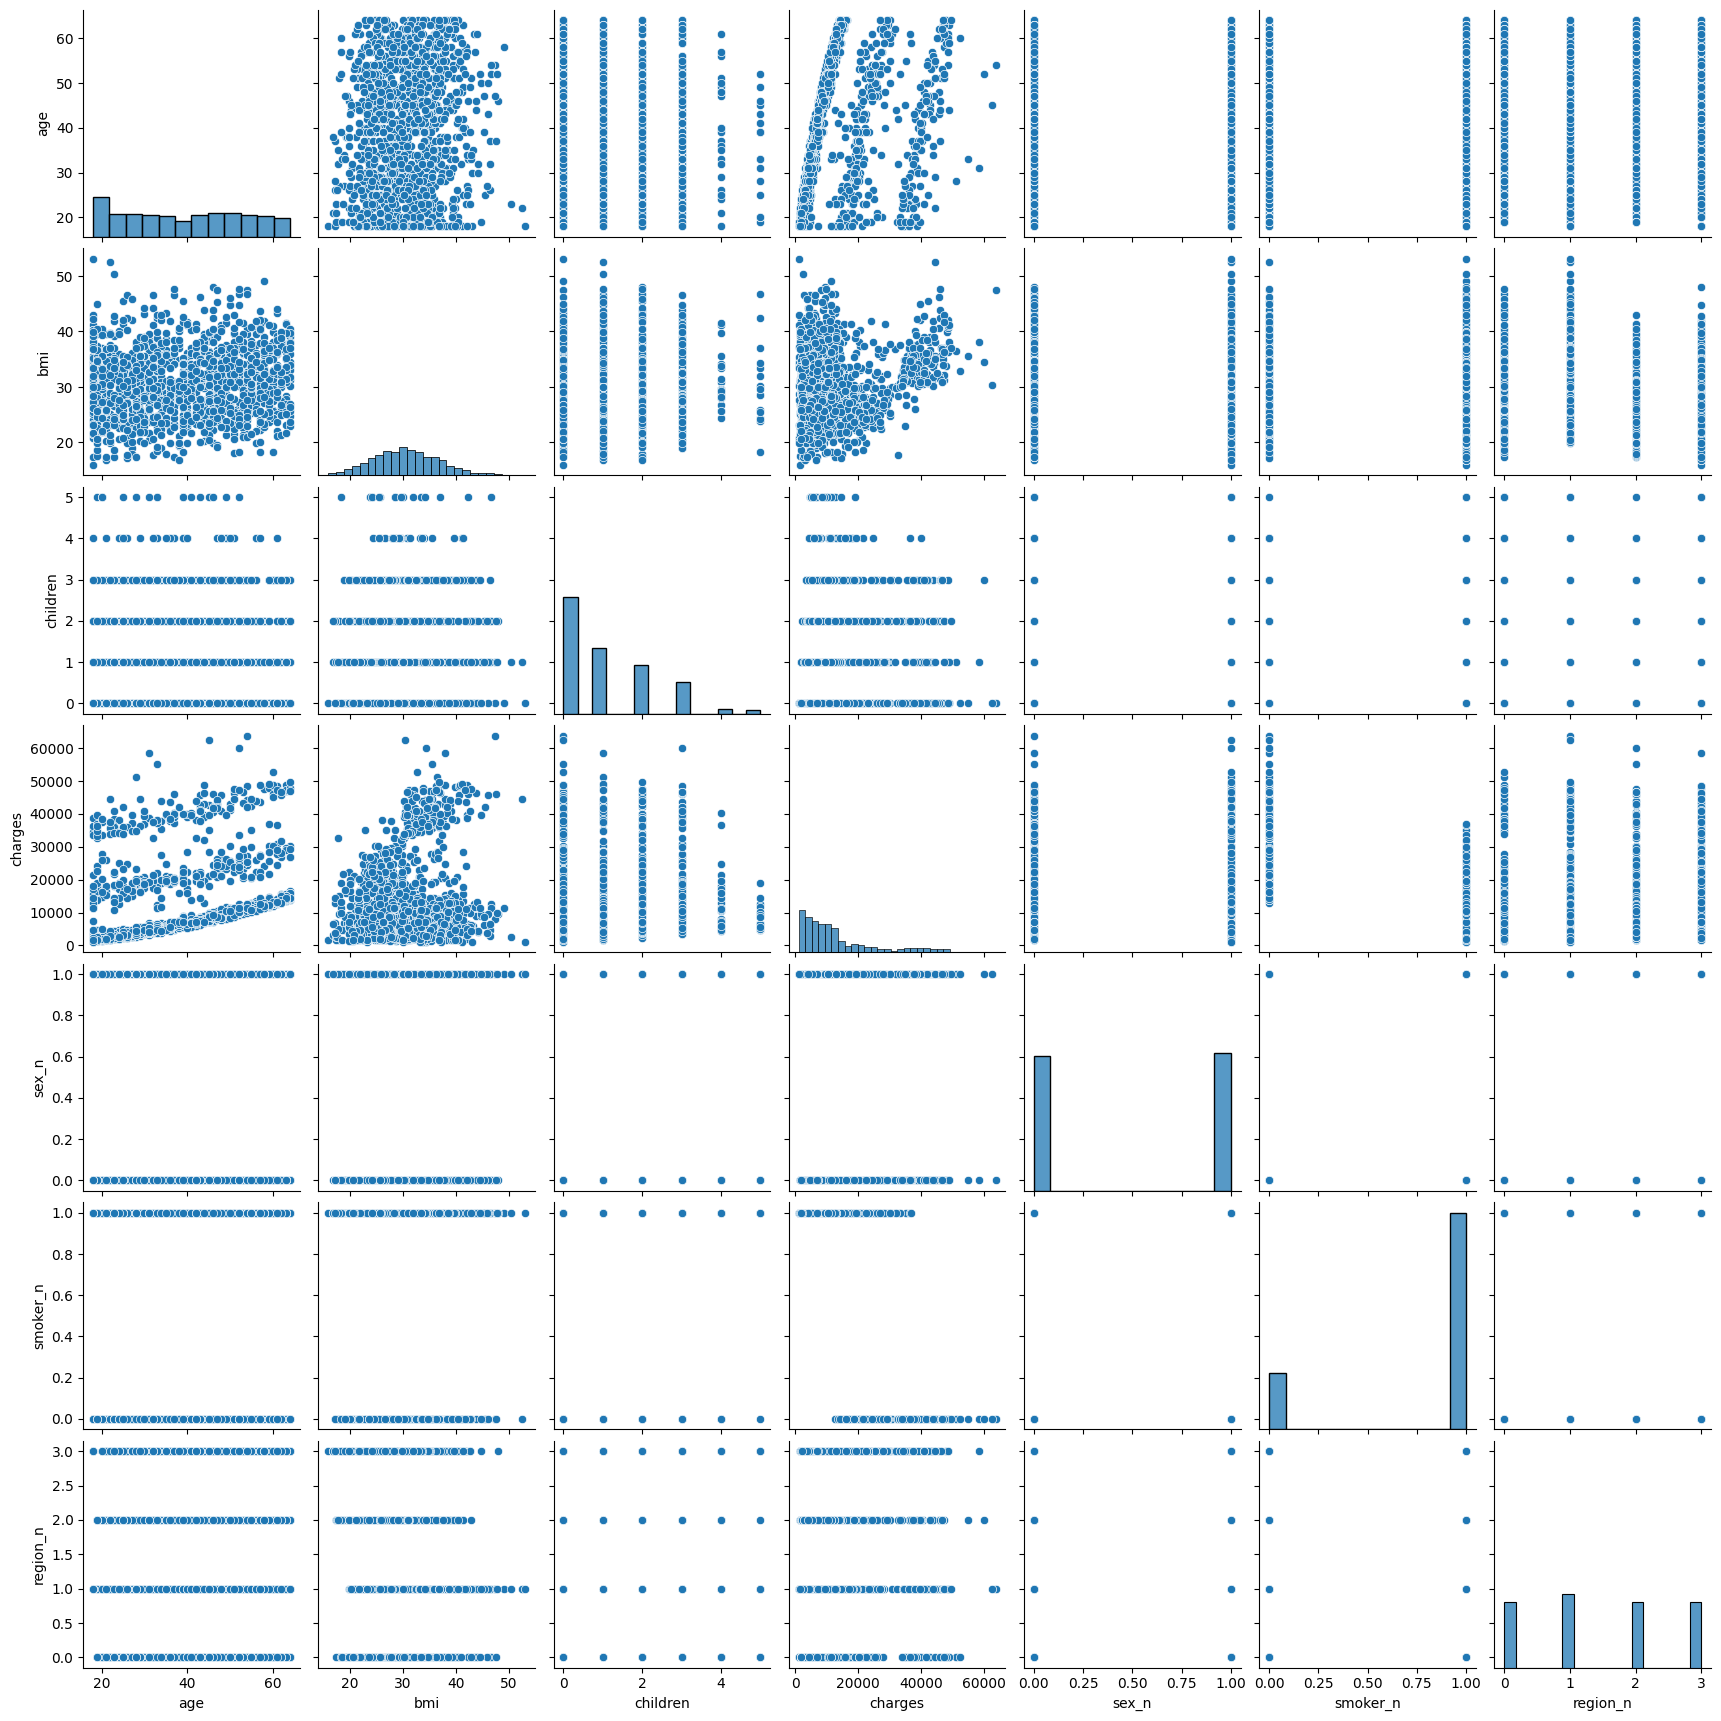

In [13]:
sns.pairplot(data=df)
plt.show()

In [11]:
#Ingeniería de características
df.describe()

,age,bmi,children,charges,sex_n,smoker_n,region_n
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265,0.505232,0.795217,1.484305
std,14.049960,6.098187,1.205493,12110.011237,0.500160,0.403694,1.104885
min,18.000000,15.960000,0.000000,1121.873900,0.000000,0.000000,0.000000
25%,27.000000,26.296250,0.000000,4740.287150,0.000000,1.000000,1.000000
50%,39.000000,30.400000,1.000000,9382.033000,1.000000,1.000000,1.000000
75%,51.000000,34.693750,2.000000,16639.912515,1.000000,1.000000,2.000000
max,64.000000,53.130000,5.000000,63770.428010,1.000000,1.000000,3.000000


/tmp/ipykernel_794/4247608958.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[contador // 4, contador % 4], data=df, y=columna, palette="viridis")
/tmp/ipykernel_794/4247608958.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[contador // 4, contador % 4], data=df, y=columna, palette="viridis")
/tmp/ipykernel_794/4247608958.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[contador // 4, contador % 4], data=df, y=columna, palette="viridis")
/tmp/ipykernel_794/4247608958.py:9: FutureWarning: 

Passing `palette`

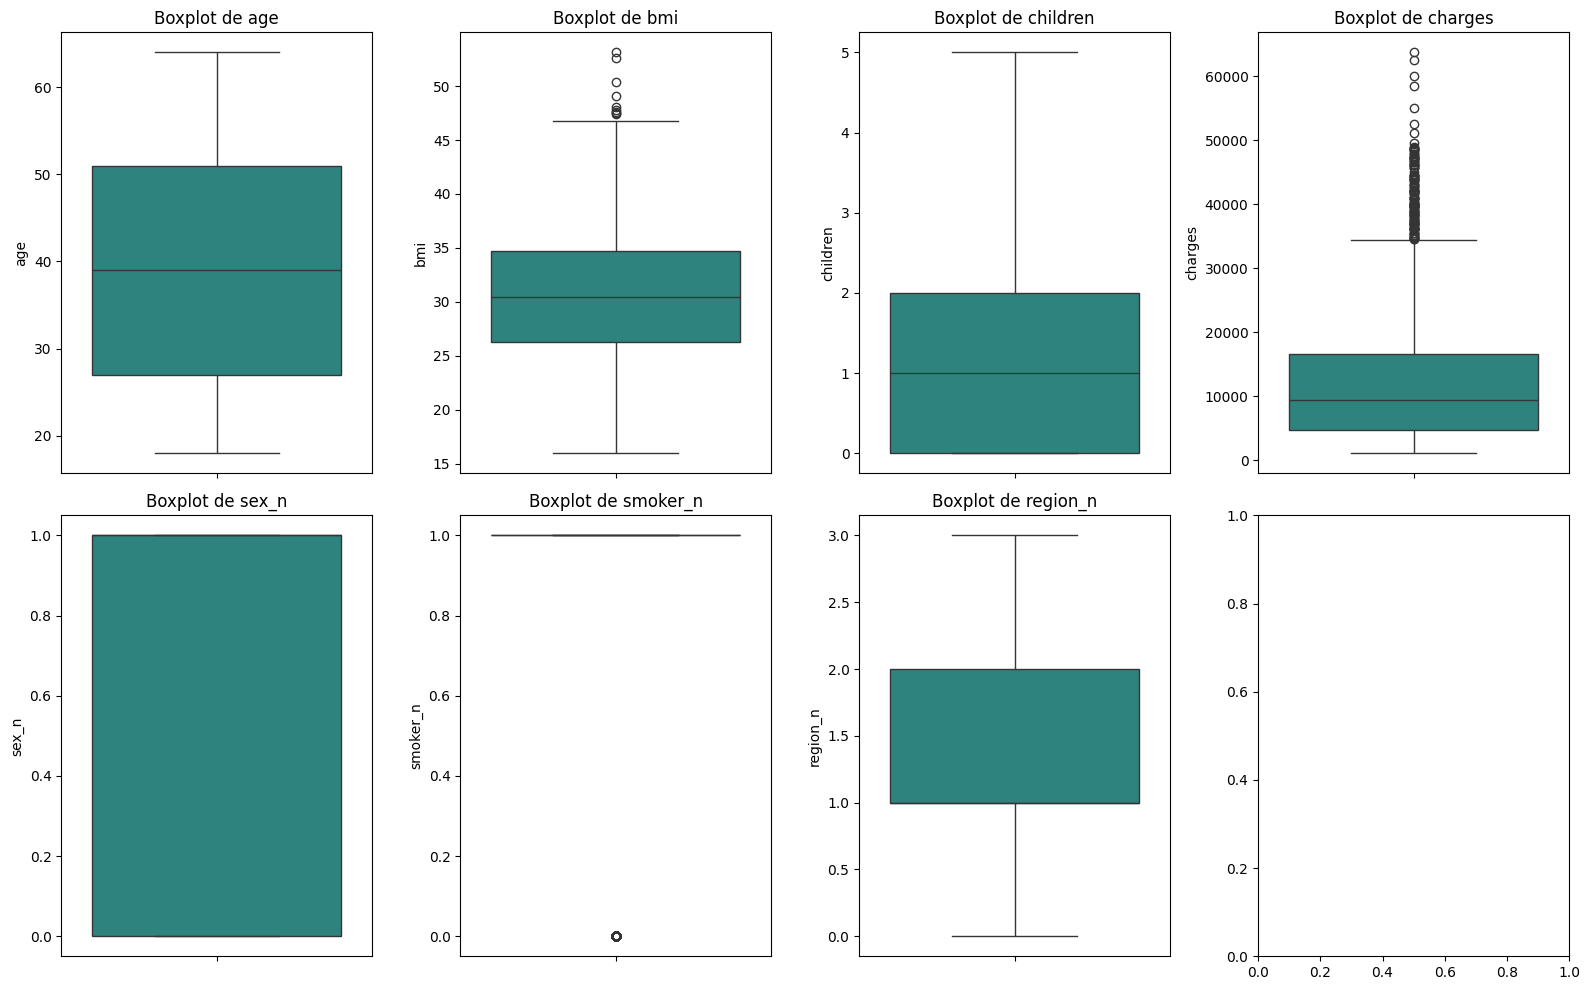

In [ ]:
listado_boxplots = ['age', 'bmi', 'children', 'charges', 'sex_n', 'smoker_n', 'region_n']

# Crear subplots para los boxplots
fig, axes = plt.subplots(2, 4, figsize=(16, 10))
contador = 0

for columna in listado_boxplots:
    sns.boxplot(ax=axes[contador // 4, contador % 4], data=df, y=columna, palette="viridis")
    axes[contador // 4, contador % 4].set_title(f"Boxplot de {columna}")
    contador += 1

# Ajustar el layout
plt.tight_layout()
plt.show()


In [14]:
#Outliers de bmi
stats_bmi=df['bmi'].describe()
stats_bmi



count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64

In [15]:
ibm_iqr=stats_bmi['75%']-stats_bmi['25%']
limite_superior=stats_bmi['75%']+1.5*ibm_iqr
limite_inferior=stats_bmi['75%']-1.5*ibm_iqr

print(f'El limite superior e inferior para encontrar outliers es {round(limite_superior,2)} y {round(limite_inferior,2)}')

El limite superior e inferior para encontrar outliers es 47.29 y 22.1


In [16]:
#Outliers de charges
stats_charges=df['charges'].describe()
stats_charges


count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

In [17]:
charges_iqr=stats_charges['75%']-stats_charges['25%']
limite_superior=stats_charges['75%']+1.5*charges_iqr
limite_inferior=stats_charges['75%']-1.5*charges_iqr

print(f'El limite superior e inferior para encontrar outliers es {round(limite_superior,2)} y {round(limite_inferior,2)}')

El limite superior e inferior para encontrar outliers es 34489.35 y -1209.53


In [18]:
# Imprimir la forma del dataframe antes del filtro
print(df.shape)

# Filtrar datos dentro de los límites calculados
df = df[(df['bmi'] >= 22.1) & (df['bmi'] <= 47.29)]
df = df[(df['charges'] >= -1209.53) & (df['charges'] <= 34489.35)]

# Imprimir la estructura del dataframe después del filtro
df.info()


(1338, 10)
<class 'pandas.core.frame.DataFrame'>
Index: 1095 entries, 0 to 1337
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1095 non-null   int64  
 1   sex       1095 non-null   object 
 2   bmi       1095 non-null   float64
 3   children  1095 non-null   int64  
 4   smoker    1095 non-null   object 
 5   region    1095 non-null   object 
 6   charges   1095 non-null   float64
 7   sex_n     1095 non-null   int64  
 8   smoker_n  1095 non-null   int64  
 9   region_n  1095 non-null   int64  
dtypes: float64(2), int64(5), object(3)
memory usage: 94.1+ KB


In [19]:
from sklearn.preprocessing import StandardScaler
#MinMax en una regresión lineal NO SE USA
scaler=StandardScaler()
variables_num=['age','bmi','children','sex_n','smoker_n','region_n']
features_escaldas=scaler.fit_transform(df[variables_num])
df_escalado=pd.DataFrame(features_escaldas,index=df.index,columns=variables_num)
df_escalado.head()

,age,bmi,children,sex_n,smoker_n,region_n
0,-1.455860,-0.568567,-0.892554,-0.979211,-2.905108,-1.347826
1,-1.527206,0.548329,-0.076057,1.021230,0.344221,-0.439599
2,-0.813741,0.401819,1.556937,1.021230,0.344221,-0.439599
3,-0.457009,-1.557030,-0.892554,1.021230,0.344221,0.468629
4,-0.528355,-0.382101,-0.892554,1.021230,0.344221,0.468629


In [20]:
df_escalado.describe()

,age,bmi,children,sex_n,smoker_n,region_n
count,1.095000e+03,1.095000e+03,1.095000e+03,1.095000e+03,1.095000e+03,1.095000e+03
mean,2.254919e-16,5.969857e-16,-6.002302e-17,-9.084565e-17,-5.191180e-17,-9.652350e-17
std,1.000457e+00,1.000457e+00,1.000457e+00,1.000457e+00,1.000457e+00,1.000457e+00
min,-1.527206e+00,-1.672144e+00,-8.925542e-01,-9.792115e-01,-2.905108e+00,-1.347826e+00
25%,-8.850877e-01,-7.702554e-01,-8.925542e-01,-9.792115e-01,3.442212e-01,-4.395987e-01
50%,4.241697e-02,-1.309418e-01,-7.605725e-02,-9.792115e-01,3.442212e-01,-4.395987e-01
75%,8.272286e-01,6.301458e-01,7.404397e-01,1.021230e+00,3.442212e-01,4.686288e-01
max,1.754733e+00,3.018058e+00,3.189930e+00,1.021230e+00,3.442212e-01,1.376856e+00


In [21]:
from sklearn.model_selection import train_test_split

x = df_escalado
y = df['charges']
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.80, random_state=42)
X_train


,age,bmi,children,sex_n,smoker_n,region_n
6,0.470496,0.485539,-0.076057,-0.979211,0.344221,-0.439599
698,1.183961,0.539767,-0.892554,1.021230,0.344221,0.468629
986,0.256457,-0.147115,1.556937,1.021230,0.344221,0.468629
1297,-0.813741,-0.833045,0.740440,-0.979211,0.344221,-0.439599
1098,0.898575,-0.002508,-0.892554,-0.979211,0.344221,1.376856
...,...,...,...,...,...,...
406,-0.457009,-1.251643,-0.892554,-0.979211,0.344221,-0.439599
563,0.755882,2.641320,-0.076057,1.021230,0.344221,-0.439599
148,0.969922,1.244724,-0.076057,-0.979211,0.344221,0.468629
1271,-1.027781,0.684373,-0.892554,-0.979211,0.344221,0.468629


In [22]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [23]:
print(model.intercept_)
print(model.coef_)

10059.432658381833
[ 3442.69332376   215.20162996   611.31422487  -179.60531838
 -4598.91316709   689.55334011]


In [24]:
y_pred=model.predict(X_test)
y_pred

array([ 9506.44583445,  3955.19122224, 12266.65612158,  8957.06815889,
       18325.53111705, 12511.56284557, 12435.7880584 ,  4182.90755562,
       12333.70875019,  7921.77972684,  7923.26316584,  9358.57101307,
        8474.40351916,  1990.60740312,  9263.81104347,  8847.32582005,
       12792.94586943, 10869.62798573, 12821.65341439,  6944.50543405,
        8364.30687072,  6561.71584249,  3695.07741342,  9920.6397426 ,
        6685.072058  , 13704.71586606, 12998.27989405, 26606.49457404,
        8529.3570107 ,  5775.50717959,  3727.78363933, 11627.48181086,
       10739.30910272, 13815.88785855, 12788.34969357, 12776.26733643,
       14568.37301326,  8324.17423322,  2848.471295  ,  7990.46072261,
        9030.05916387,  9254.77390282, 11070.27383351, 25079.57547497,
        4789.45872006,  2637.0953806 ,  8668.26993704, 12604.77284732,
       14052.5957489 ,  2840.02856806,  5450.74294089,  3256.81044562,
        9701.33900404, 11402.67563072, 13713.68719426,  3840.5921314 ,
      

In [25]:
from sklearn.metrics import mean_squared_error,r2_score
print(f'MSE: {mean_squared_error(y_test,y_pred)}')
print(f'R2: {r2_score(y_test,y_pred)}')


MSE: 21163127.23309779
R2: 0.5686031066208754


In [26]:
X_train=X_train[['age','bmi','smoker_n']]
X_test=X_test[['age','bmi','smoker_n']]

model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print(f'MSE: {mean_squared_error(y_test,y_pred)}')
print(f'R2: {r2_score(y_test,y_pred)}')

MSE: 20910597.972012114
R2: 0.5737507550529706


In [27]:
from pickle import dump
dump(model,open('../models/linear_regression_default.sav','wb'))

In [28]:
len(y_pred)

219

In [29]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 219 entries, 644 to 2
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       219 non-null    float64
 1   bmi       219 non-null    float64
 2   smoker_n  219 non-null    float64
dtypes: float64(3)
memory usage: 6.8 KB
